**1.Import Libraries & Load Dataset**





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



In [3]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


**2. Data Cleaning & Preprocessing**

In [4]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'name', 'host_name', 'last_review'])

# Handle missing values
df['reviews_per_month'].fillna(0, inplace=True)

# Remove listings with price = 0
df = df[df['price'] > 0]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7390 entries, 0 to 7389
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         7390 non-null   int64  
 1   neighbourhood_group             7390 non-null   object 
 2   neighbourhood                   7390 non-null   object 
 3   latitude                        7390 non-null   float64
 4   longitude                       7390 non-null   float64
 5   room_type                       7390 non-null   object 
 6   price                           7390 non-null   float64
 7   minimum_nights                  7390 non-null   float64
 8   number_of_reviews               7390 non-null   float64
 9   reviews_per_month               7390 non-null   float64
 10  calculated_host_listings_count  7390 non-null   float64
 11  availability_365                7390 non-null   float64
dtypes: float64(8), int64(1), object(3)
memo

/tmp/ipython-input-3897542478.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


**3. Exploratory Data Analysis (EDA)**

Price Distribution

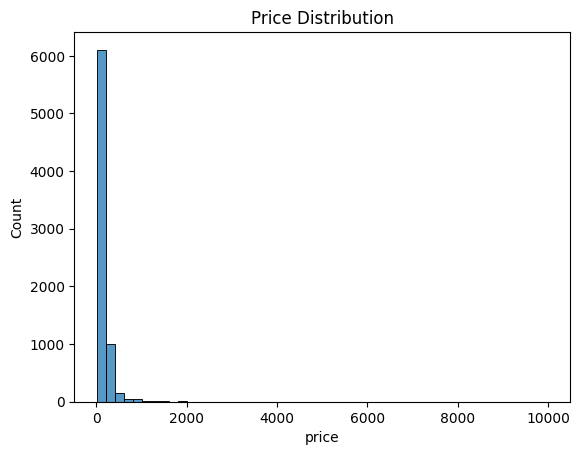

In [5]:
plt.figure()
sns.histplot(df['price'], bins=50)
plt.title("Price Distribution")
plt.show()


Room Type vs Price

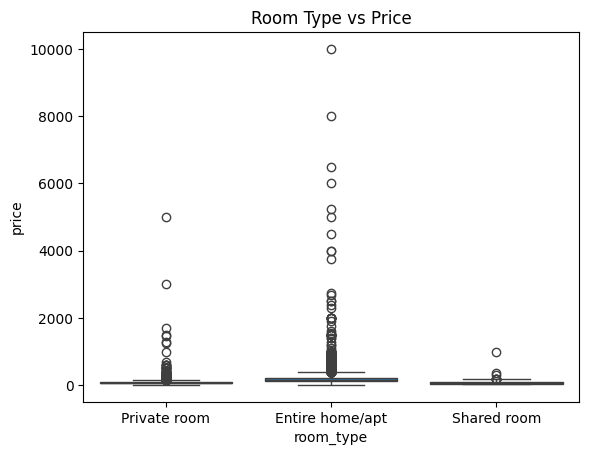

In [6]:
plt.figure()
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Room Type vs Price")
plt.show()


Neighbourhood Group vs Price

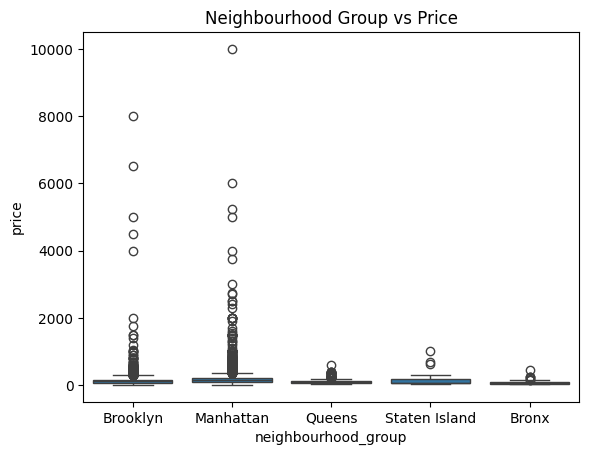

In [7]:
plt.figure()
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Neighbourhood Group vs Price")
plt.show()


**4. Feature Engineering**

In [8]:
X = df[['neighbourhood_group', 'room_type', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]

y = df['price']

categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


**5. Train-Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**6. Machine Learning Model (Price Prediction)**

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [14]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'room_type'])])),
                ('model', RandomForestRegressor(random_state=42))])

**7. Model Evaluation**

In [15]:
y_pred = pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 96.90789810635297
RMSE: 348.24765963340155
R2 Score: 0.14863954469160667


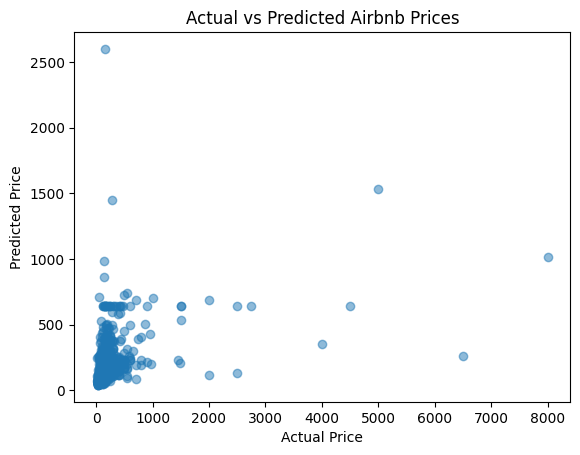

In [16]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airbnb Prices")
plt.show()
